In [198]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [199]:
file_to_df = pd.read_json("/home/louis/LEON/DATA/Atoms/2024/PINNS2/CNN/model_analysis_single_power.json")
df_to_json = file_to_df.to_json()
json_to_dict = json.loads(df_to_json )

Model comparison

In [200]:
model_v2_accuracy_n2 = []
model_v2_index_error_n2 = []

model_v2_accuracy_isat = []
model_v2_index_error_isat = []

model_v3_accuracy_n2 = []
model_v3_index_error_n2 = []

model_v3_accuracy_isat = []
model_v3_index_error_isat = []

model_v4_accuracy_n2 = []
model_v4_index_error_n2 = []

model_v4_accuracy_isat = []
model_v4_index_error_isat = []

model_v5_accuracy_n2 = []
model_v5_index_error_n2 = []

model_v5_accuracy_isat = []
model_v5_index_error_isat = []

data_types = ["amp", "amp_pha", "amp_pha_unwrap", "pha", "pha_unwrap", "amp_pha_pha_unwrap"]
model_types = [["model_resnetv2_1powers",model_v2_accuracy_n2,model_v2_index_error_n2,
                model_v2_accuracy_isat,model_v2_index_error_isat],
                ["model_resnetv3_1powers",model_v3_accuracy_n2,model_v3_index_error_n2,
                model_v3_accuracy_isat,model_v3_index_error_isat], 
                ["model_resnetv4_1powers",model_v4_accuracy_n2,model_v4_index_error_n2,
                model_v4_accuracy_isat,model_v4_index_error_isat],
                ["model_resnetv5_1powers",model_v5_accuracy_n2,model_v5_index_error_n2,
                model_v5_accuracy_isat,model_v5_index_error_isat]]

for data_type in data_types:
    for properties in model_types:
        model_type = properties[0]
        model_accuracy_n2 = properties[1]
        model_index_error_n2 = properties[2]

        model_accuracy_isat = properties[3]
        model_index_error_isat = properties[4]

        model_accuracy_n2 += [json_to_dict[data_type][model_type]["accuracy_n2"]]
        model_index_error_n2 += [json_to_dict[data_type][model_type]["index_error_n2"]]

        model_accuracy_isat += [json_to_dict[data_type][model_type]["accuracy_isat"]]
        model_index_error_isat += [json_to_dict[data_type][model_type]["index_error_isat"]]

In [201]:
for index in range(len(model_types)):
    for i in range(1,5):
        model_types[index][i] = np.array(model_types[index][i])

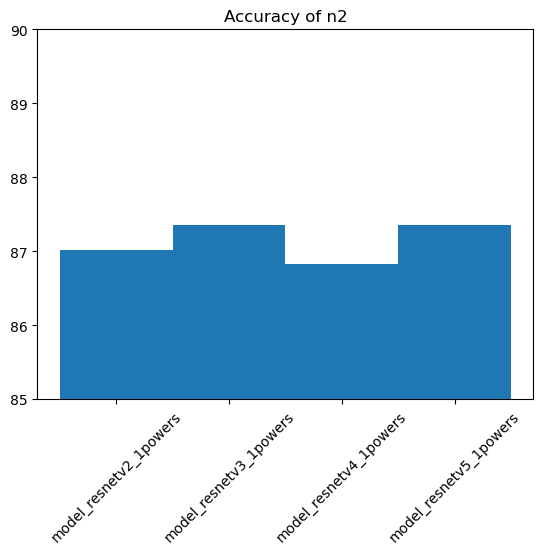

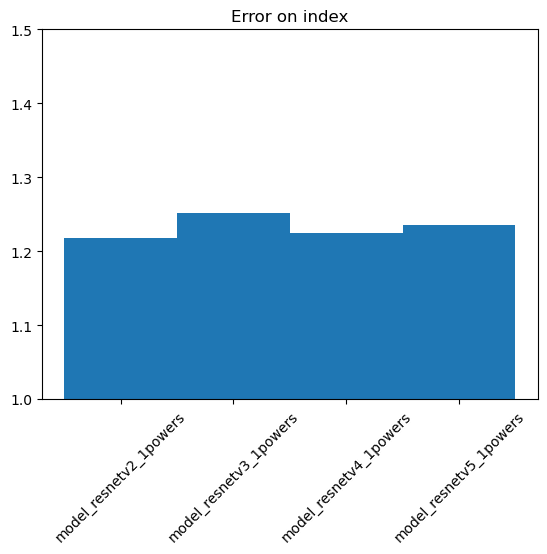

In [202]:
mean_accuracy_n2_models = np.zeros(4)
mean_index_error_n2_models = np.zeros(4)
models_list = []


for index in range(len(model_types)):
    models_list += [model_types[index][0]]
    mean_accuracy_n2_models[index] = np.mean(model_types[index][1])
    mean_index_error_n2_models[index] = np.mean(model_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [85,90]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of n2")
plt.stairs(mean_accuracy_n2_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [1,1.5]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_n2_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

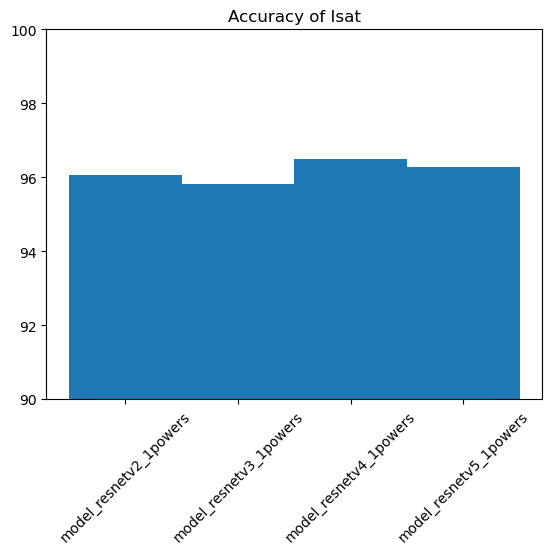

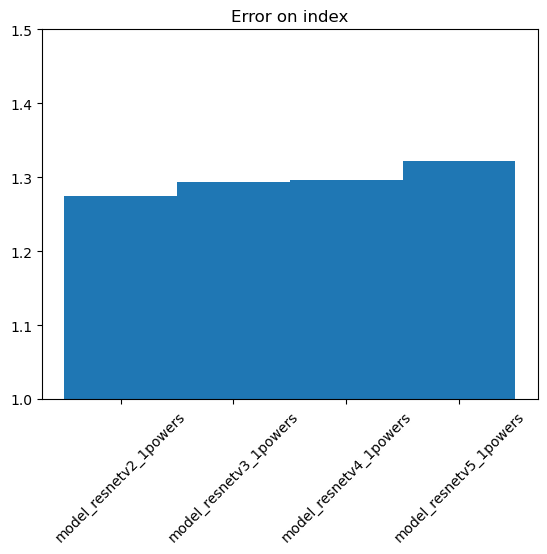

In [203]:
mean_accuracy_isat_models = np.zeros(4)
mean_index_error_isat_models = np.zeros(4)
models_list = []


for index in range(len(model_types)):
    models_list += [model_types[index][0]]
    mean_accuracy_isat_models[index] = np.mean(model_types[index][3])
    mean_index_error_isat_models[index] = np.mean(model_types[index][4])

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [90,100]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of Isat")
plt.stairs(mean_accuracy_isat_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [1,1.5]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_isat_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

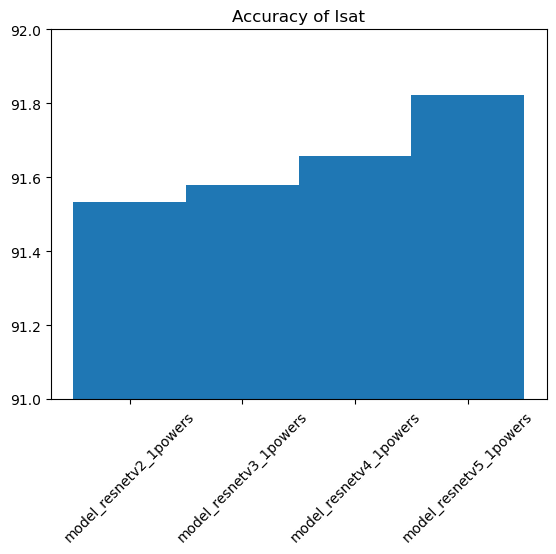

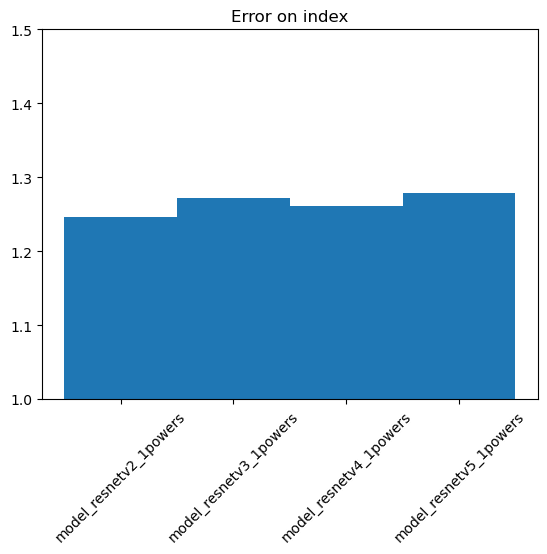

In [211]:
mean_accuracy_models = (mean_accuracy_n2_models + mean_accuracy_isat_models)/2
mean_index_error_models = (mean_index_error_n2_models + mean_index_error_isat_models )/2

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [91,92]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of Isat")
plt.stairs(mean_accuracy_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

x_positions = [0.5, 1.5, 2.5, 3.5]
y_positions = [1,1.5]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_models, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, models_list, rotation=45)
plt.show()

Datatype comparison

In [205]:
amp_accuracy_n2 = []
amp_index_error_n2 = []

amp_accuracy_isat = []
amp_index_error_isat = []

amp_pha_accuracy_n2 = []
amp_pha_index_error_n2 = []

amp_pha_accuracy_isat = []
amp_pha_index_error_isat = []

amp_pha_unwrap_accuracy_n2 = []
amp_pha_unwrap_index_error_n2 = []

amp_pha_unwrap_accuracy_isat = []
amp_pha_unwrap_index_error_isat = []

pha_accuracy_n2 = []
pha_index_error_n2 = []

pha_accuracy_isat = []
pha_index_error_isat = []

pha_unwrap_accuracy_n2 = []
pha_unwrap_index_error_n2 = []

pha_unwrap_accuracy_isat = []
pha_unwrap_index_error_isat = []

amp_pha_pha_unwrap_accuracy_n2 = []
amp_pha_pha_unwrap_index_error_n2 = []

amp_pha_pha_unwrap_accuracy_isat = []
amp_pha_pha_unwrap_index_error_isat = []

data_types = [["amp",amp_accuracy_n2,amp_index_error_n2,
                amp_accuracy_isat,amp_index_error_isat],
                ["amp_pha",amp_pha_accuracy_n2,amp_pha_index_error_n2,
                amp_pha_accuracy_isat,amp_pha_index_error_isat], 
                ["amp_pha_unwrap",amp_pha_unwrap_accuracy_n2,amp_pha_unwrap_index_error_n2,
                amp_pha_unwrap_accuracy_isat,amp_pha_unwrap_index_error_isat],
                ["pha",pha_accuracy_n2,pha_index_error_n2,
                pha_accuracy_isat,pha_index_error_isat],
                ["pha_unwrap",pha_unwrap_accuracy_n2,pha_unwrap_index_error_n2,
                pha_unwrap_accuracy_isat,pha_unwrap_index_error_isat],
                ["amp_pha_pha_unwrap",amp_pha_pha_unwrap_accuracy_n2,amp_pha_pha_unwrap_index_error_n2,
                amp_pha_pha_unwrap_accuracy_isat,amp_pha_pha_unwrap_index_error_isat]]


model_types = ["model_resnetv2_1powers","model_resnetv3_1powers","model_resnetv4_1powers","model_resnetv5_1powers"]

for model_type in model_types:
    for properties in data_types:
        data_type = properties[0]
        data_accuracy_n2 = properties[1]
        data_index_error_n2 = properties[2]
        data_accuracy_isat = properties[3]
        data_index_error_isat = properties[4]

        data_accuracy_n2 += [json_to_dict[data_type][model_type]["accuracy_n2"]]
        data_index_error_n2 += [json_to_dict[data_type][model_type]["index_error_n2"]]

        data_accuracy_isat += [json_to_dict[data_type][model_type]["accuracy_isat"]]
        data_index_error_isat += [json_to_dict[data_type][model_type]["index_error_isat"]]

In [206]:
for index in range(len(data_types)):
    for i in range(1,5):
        data_types[index][i] = np.array(data_types[index][i])

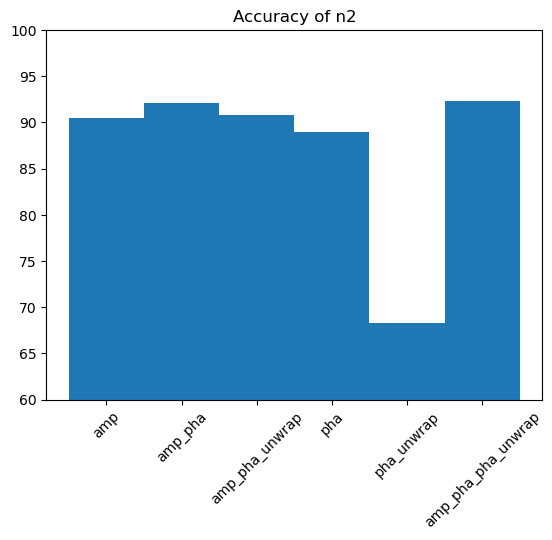

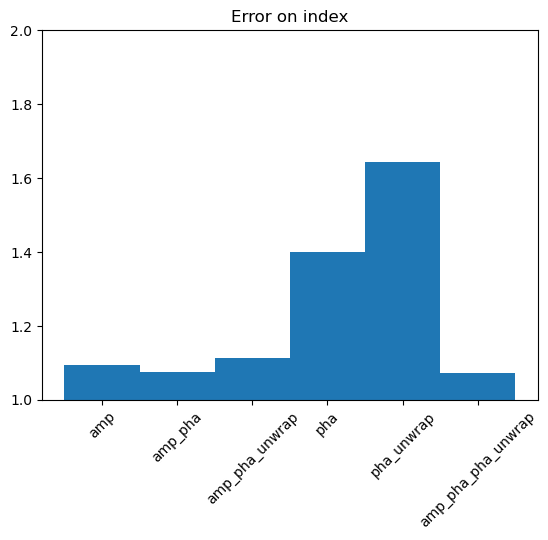

In [207]:
mean_accuracy_data_n2 = np.zeros(6)
mean_index_error_data_n2 = np.zeros(6)
data_type_list = []


for index in range(len(data_types)):
    data_type_list += [data_types[index][0]]
    mean_accuracy_data_n2[index] = np.mean(data_types[index][1])
    mean_index_error_data_n2[index] = np.mean(data_types[index][2])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
y_positions = [60,100]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of n2")
plt.stairs(mean_accuracy_data_n2, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

y_positions = [1,2]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_data_n2, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

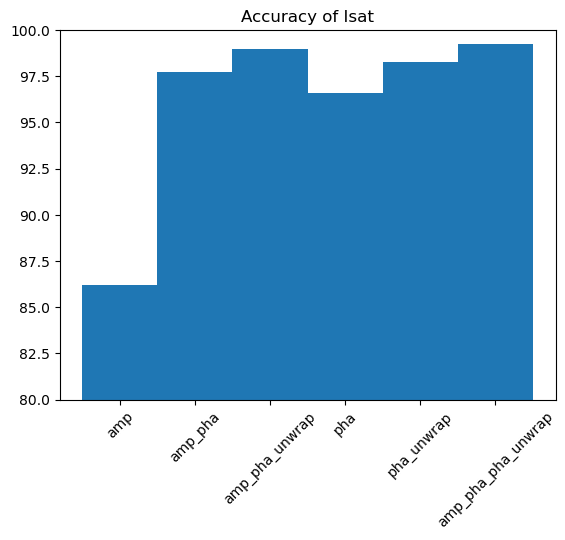

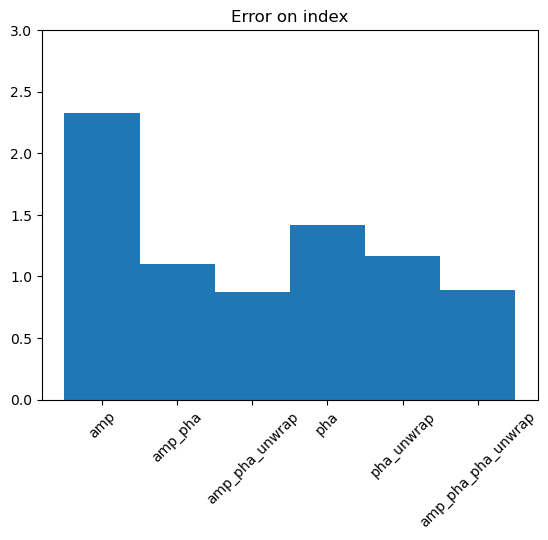

In [208]:
mean_accuracy_data_isat = np.zeros(6)
mean_index_error_data_isat = np.zeros(6)
data_type_list = []


for index in range(len(data_types)):
    data_type_list += [data_types[index][0]]
    mean_accuracy_data_isat[index] = np.mean(data_types[index][3])
    mean_index_error_data_isat[index] = np.mean(data_types[index][4])

x_positions = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
y_positions = [80,100]
# plt.figure(figsize=(10,10))
plt.title("Accuracy of Isat")
plt.stairs(mean_accuracy_data_isat, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

y_positions = [0,3]
# plt.figure(figsize=(10,10))
plt.title("Error on index")
plt.stairs(mean_index_error_data_isat, fill=True)
plt.ylim(y_positions)
plt.xticks(x_positions, data_type_list, rotation=45)
plt.show()

Best type is Amplitude + Phase unwrap